# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import *

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
import numpy as np

In [6]:
from collections import Counter

In [7]:
import seaborn as sns
import string

In [8]:
from nltk.util import ngrams

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
df_all = pd.read_csv('questions - questions-2.csv')

In [11]:
df_trans_links = pd.read_csv('Questions_links_translations.csv')

In [12]:
df_all.head()

,Year,Month,Question,Answer,Document,URLs
0,2018,12,\n1. Heeft het college kennisgenomen van de ge...,\nNee. \n,https://amsterdam.raadsinformatie.nl/document/...,NaN
1,2018,12,\n2. Kan het college bevestigen of dit lesmate...,"\nNee, het college heeft hier geen zicht op. ...",https://amsterdam.raadsinformatie.nl/document/...,NaN
2,2018,12,\n3. Acht het college het wenselijk dat lesmat...,\nHet CIDI is duidelijk over de eigen doelste...,https://amsterdam.raadsinformatie.nl/document/...,NaN
3,2018,12,\n4. Is het college bekend met de jaarlijks te...,\nHet college heeft hier kennis van genomen. ...,https://amsterdam.raadsinformatie.nl/document/...,NaN
4,2018,12,\n5. Gaat het college zich inspannen om ervoor...,\nNee. De onderwijsinspectie is verantwoordel...,https://amsterdam.raadsinformatie.nl/document/...,NaN


<AxesSubplot:>

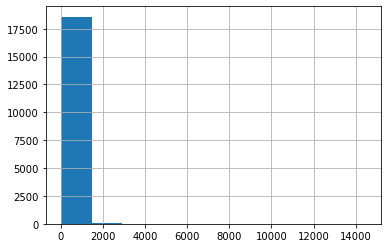

In [13]:
df_all['Question'].str.len().hist()

<AxesSubplot:>

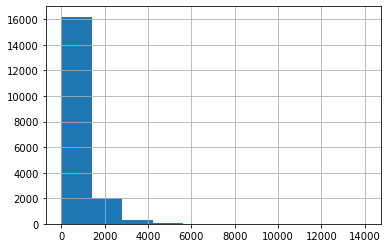

In [14]:
df_all['Answer'].str.len().hist()

<AxesSubplot:>

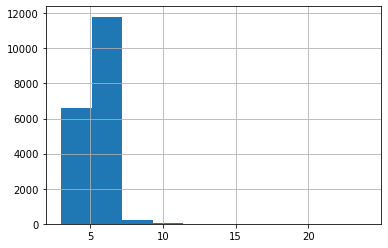

In [15]:
# Avg word len question
df_all['Question'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [16]:
df_trans_links.head()

,Unnamed: 0,Year,Month,Question,Answer,Document,URLs,Translated Questions,Translated Answers
0,9,2015,1,\n1. Komt het in Amsterdam al voor dat er gesu...,\nMomenteel vindt er geen gemeentelijk taalaa...,https://amsterdam.raadsinformatie.nl/document/...,http://www.parool.nl/parool/nl/4060/AMSTERDAM-...,1. Does it already happen in Amsterdam that su...,Currently there is no municipal language offer...
1,25,2013,6,\n1. Is het college op de hoogte van het rappo...,"\nJa, het college heeft kennisgenomen van het...",https://amsterdam.raadsinformatie.nl/document/...,http://www.dekinderombudsman.nl/86/volwassen/n...,1. Is the Board aware of the report of the Omb...,"Yes, the Board has taken note of the report. T..."
2,92,2013,9,\n1. Heeft het college kennisgenomen van de be...,\nJa. \n ...,https://amsterdam.raadsinformatie.nl/document/...,http://afvalonline.nl/bericht?id=17424\nhttp:/...,1. Has the Commission taken note of the report...,Yes.\n ...
3,101,2013,7,\n6. Wat gaat het college doen om ervoor te zo...,\nEen klas van 28 leerlingen wordt niet als i...,https://amsterdam.raadsinformatie.nl/document/...,http://www.rekenkamer.nl/Publicaties/Onderzoek...,6. What will the council do to ensure that the...,A class of 28 students is not considered an id...
4,117,2020,4,\n2. Wat doet de gemeente de komende weken om ...,\nNatuurlijke bestrijding \n- Er zijn...,https://amsterdam.raadsinformatie.nl/document/...,https://maps.amsterdam.nl/eikenprocessierups/,2. What will the municipality do about the num...,"Natural control\n- Approx. 3,000 bird nest box..."


# General idea

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18711 entries, 0 to 18710
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      18711 non-null  int64 
 1   Month     18711 non-null  int64 
 2   Question  18711 non-null  object
 3   Answer    18703 non-null  object
 4   Document  18711 non-null  object
 5   URLs      639 non-null    object
dtypes: int64(2), object(4)
memory usage: 877.2+ KB


In [18]:
questions = df_all['Question']

In [19]:
answers = df_all['Answer']

# Pre-processing

In this section, the questions and answers are pre-processed. The pre-processing step is needed, so that the analysis is performed on data which has less noise (such as stopwords, punctuation etc.)

### Import stopwords

In [20]:
stop = stopwords.words('dutch')

### Tokenize

In [21]:
def tokenize(text):
    """
        Tokenizes the input text.
        Input: text - type(str)
        Output: a list of tokens - type(list)
    """
    tokens = word_tokenize(text, language='dutch')
    return tokens

### Stemming

In [22]:
def stem_token(token): # Doesn't work rn, should check how to do for Dutch
    """
        Stems the given token using the PorterStemmer from the nltk library
        Input: a single token
        Output: the stem of the token
    """
    stemmer = PorterStemmer()
    return stemmer.stem(token)

### Combined

In [23]:
def process_text(text, stop_words, stem=False, remove_stopwords=False, lowercase_text=False):
    """
    Given a string, the function tokenizes
    it and processes it according to the set requirements.
    """
    tokens = []
    for token in tokenize(text):
        if remove_stopwords and token.lower() in stop_words:
            continue
        if stem:
            token = stem_token(token)
        if lowercase_text:
            token = token.lower()
        tokens.append(token)

    return tokens

### Try

In [24]:
process_text(questions[0], stop, stem=False, remove_stopwords=True, lowercase_text=True)

['1', '.', 'college', 'kennisgenomen', 'genoemde', 'publicatie', 'cidi', '?']

# Lengths, Distributions, etc.

In [25]:
questions_prepr = []
questions_len = []
for question in questions:
    preprocessed = process_text(question, stop, remove_stopwords=True, lowercase_text=True)
    questions_prepr.append(preprocessed)
    questions_len.append(len(preprocessed))

In [26]:
questions_len

[8,
 10,
 13,
 29,
 25,
 21,
 14,
 18,
 32,
 14,
 20,
 20,
 30,
 19,
 18,
 22,
 10,
 22,
 19,
 17,
 30,
 23,
 25,
 8,
 18,
 14,
 27,
 15,
 28,
 19,
 37,
 43,
 66,
 8,
 20,
 36,
 31,
 38,
 15,
 24,
 21,
 14,
 13,
 20,
 20,
 24,
 8,
 26,
 13,
 41,
 29,
 17,
 17,
 12,
 24,
 14,
 17,
 25,
 9,
 13,
 19,
 8,
 15,
 11,
 12,
 12,
 26,
 30,
 44,
 20,
 37,
 42,
 38,
 51,
 37,
 25,
 39,
 19,
 10,
 15,
 35,
 18,
 40,
 24,
 14,
 18,
 21,
 23,
 29,
 34,
 25,
 21,
 8,
 17,
 28,
 16,
 6,
 11,
 22,
 11,
 20,
 19,
 8,
 18,
 23,
 30,
 8,
 9,
 8,
 15,
 14,
 12,
 22,
 26,
 34,
 20,
 16,
 16,
 17,
 20,
 12,
 20,
 22,
 26,
 77,
 13,
 22,
 16,
 48,
 16,
 20,
 9,
 12,
 26,
 18,
 32,
 32,
 7,
 36,
 14,
 15,
 19,
 11,
 19,
 10,
 12,
 26,
 38,
 15,
 29,
 37,
 27,
 37,
 23,
 22,
 7,
 18,
 15,
 17,
 25,
 9,
 14,
 21,
 38,
 22,
 29,
 13,
 7,
 7,
 6,
 27,
 27,
 35,
 17,
 32,
 24,
 48,
 33,
 25,
 12,
 15,
 13,
 11,
 26,
 27,
 19,
 22,
 43,
 34,
 13,
 21,
 13,
 22,
 23,
 23,
 22,
 22,
 36,
 19,
 16,
 33,
 67,
 30,
 15,

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3cc7c9a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3cc7d9100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3cc7c96a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3cc7d97c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3cc7d9b20>],
 'means': []}

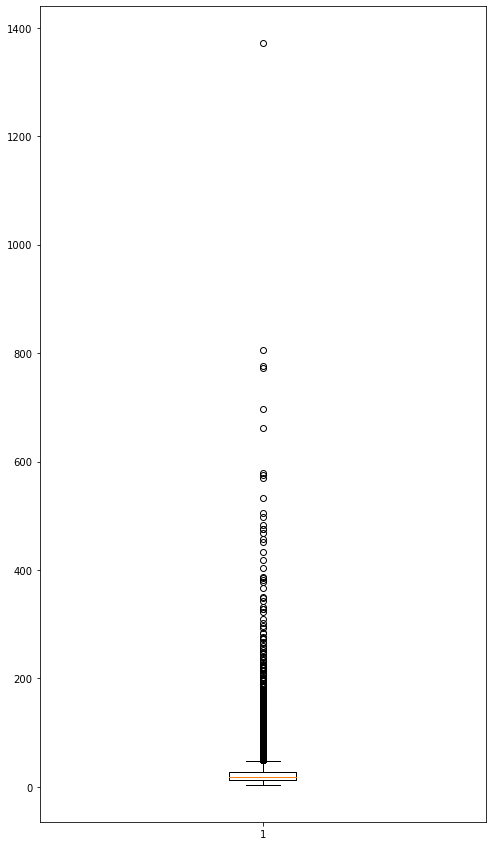

In [27]:
plt.figure(figsize=(8, 15))
plt.boxplot(questions_len)

In [28]:
answers_prepr = []
answers_len = []
for answer in answers:
    preprocessed = process_text(str(answer), stop, remove_stopwords=True, lowercase_text=True)
    answers_prepr.append(preprocessed)
    answers_len.append(len(preprocessed))

In [29]:
answers_len

[2,
 13,
 19,
 60,
 29,
 80,
 38,
 38,
 100,
 69,
 5,
 94,
 50,
 17,
 1,
 41,
 20,
 24,
 36,
 32,
 20,
 42,
 55,
 51,
 35,
 79,
 711,
 101,
 125,
 140,
 118,
 258,
 244,
 10,
 103,
 200,
 16,
 22,
 65,
 67,
 26,
 19,
 149,
 127,
 85,
 213,
 69,
 88,
 11,
 94,
 86,
 38,
 209,
 63,
 70,
 43,
 31,
 44,
 33,
 118,
 46,
 94,
 45,
 178,
 113,
 75,
 161,
 76,
 160,
 6,
 295,
 53,
 38,
 159,
 114,
 36,
 20,
 64,
 34,
 5,
 87,
 28,
 94,
 34,
 1,
 102,
 168,
 93,
 5,
 23,
 33,
 80,
 19,
 165,
 123,
 8,
 6,
 57,
 113,
 102,
 127,
 193,
 152,
 12,
 152,
 59,
 28,
 8,
 30,
 42,
 83,
 24,
 56,
 55,
 99,
 79,
 1,
 258,
 21,
 62,
 34,
 70,
 3,
 80,
 123,
 36,
 24,
 18,
 129,
 103,
 53,
 98,
 5,
 96,
 35,
 64,
 20,
 87,
 82,
 80,
 55,
 1,
 116,
 54,
 49,
 16,
 16,
 39,
 31,
 229,
 16,
 130,
 117,
 14,
 66,
 67,
 119,
 123,
 57,
 29,
 26,
 62,
 47,
 101,
 54,
 32,
 88,
 68,
 19,
 67,
 86,
 28,
 41,
 66,
 75,
 46,
 54,
 8,
 86,
 63,
 59,
 30,
 89,
 30,
 52,
 130,
 63,
 86,
 62,
 11,
 30,
 18,
 118,
 51,


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3ab563ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb3ab56f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3ab563940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3ab56fa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3ab56fdc0>],
 'means': []}

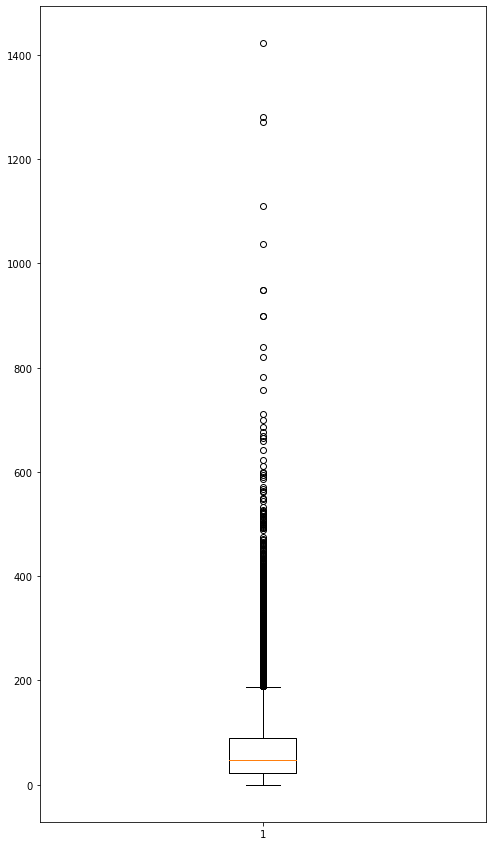

In [30]:
plt.figure(figsize=(8, 15))
plt.boxplot(answers_len)

### Most common words

#### Questions

In [31]:
corpus_q = sum(questions_prepr, [])

In [32]:
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
corpus_q = [token.translate(translator) for token in corpus_q if token not in string.punctuation]

<AxesSubplot:>

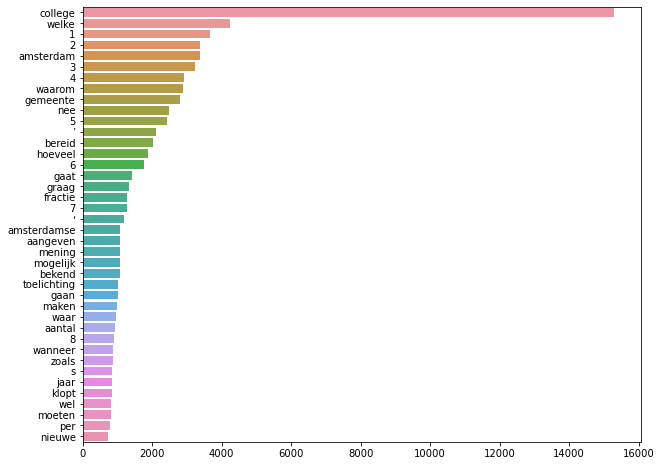

In [33]:
counter=Counter(corpus_q)
most=counter.most_common()

x, y= [], []
plt.figure(figsize=(10, 8))
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### Answers 

In [34]:
corpus_a = sum(answers_prepr, [])

translator = str.maketrans('', '', string.punctuation)

# Remove punctuation
corpus_a = [token.translate(translator) for token in corpus_a if token not in string.punctuation]

<AxesSubplot:>

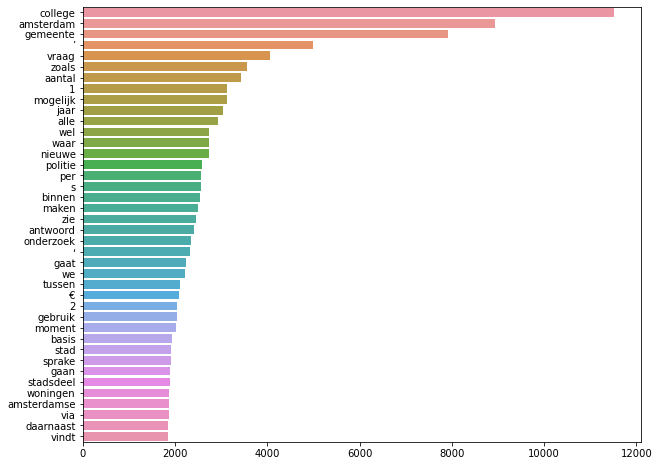

In [35]:
counter=Counter(corpus_a)
most=counter.most_common()

plt.figure(figsize=(10, 8))
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#### n-grams

In [36]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

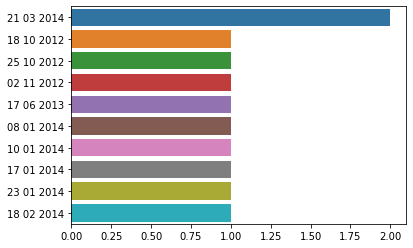

In [37]:
top_n_bigrams=get_top_ngram(corpus_q,3)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

<AxesSubplot:>

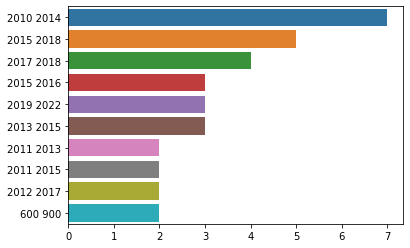

In [38]:
top_n_bigrams=get_top_ngram(corpus_a,2)
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

#### TF-IDF 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Questions

In [56]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stop,
                             max_df=0.6,
                             min_df=3)

In [57]:
tfidf_q = vectorizer.fit_transform(questions)

In [58]:
feature_names = vectorizer.get_feature_names_out()
tf_idf_sum = tfidf_q.sum(axis=0)
tf_idf_scores = [(feature_names[i], tf_idf_sum[0, i]) for i in range(len(feature_names))]
tf_idf_scores = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)

# Print the top 10 most important words in the corpus
for term, score in tf_idf_scores[:20]:
    print(f"{term}: {score:.2f}")


welke: 346.96
amsterdam: 293.35
waarom: 261.37
gemeente: 249.38
nee: 222.72
hoeveel: 205.61
bereid: 195.76
nee waarom: 182.21
college bereid: 175.98
gaat: 152.14
bekend: 151.38
graag: 144.80
fractie: 138.79
aangeven: 128.08
mening: 126.64
amsterdamse: 123.47
toelichting: 120.95
klopt: 117.28
gaan: 115.56
mogelijk: 114.09


#### Answers

In [43]:
answers.isnull().values.any()

True

In [44]:
answers.isnull().sum()

8

In [45]:
answers = answers.dropna()

In [59]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),
                             stop_words = stop,
                             max_df=0.6,
                             min_df=3)
tfidf_a = vectorizer.fit_transform(answers)

In [60]:
feature_names = vectorizer.get_feature_names_out()
tf_idf_sum = tfidf_a.sum(axis=0)
tf_idf_scores = [(feature_names[i], tf_idf_sum[0, i]) for i in range(len(feature_names))]
tf_idf_scores = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)

# Print the top 10 most important words in the corpus
for term, score in tf_idf_scores[:50]:
    print(f"{term}: {score:.2f}")



college: 399.90
vraag: 333.40
zie: 309.82
amsterdam: 304.28
antwoord: 267.45
gemeente: 267.05
zie antwoord: 238.85
antwoord vraag: 238.61
zie antwoord vraag: 222.49
nee: 165.56
politie: 150.02
zoals: 146.46
aantal: 135.17
mogelijk: 130.25
bekend: 129.49
onderzoek: 121.34
alle: 121.04
jaar: 118.74
nieuwe: 117.96
wel: 117.70
waar: 116.97
vragen: 112.03
binnen: 110.24
maken: 107.82
beantwoording: 107.59
per: 107.08
we: 103.95
moment: 103.21
gaat: 102.03
stadsdeel: 100.94
gebruik: 100.15
sprake: 99.86
woningen: 98.97
gemeente amsterdam: 98.67
nl: 98.00
vindt: 97.94
stad: 95.20
tussen: 92.51
gaan: 91.35
maatregelen: 90.44
via: 89.96
amsterdamse: 89.37
2019: 88.35
informatie: 87.18
basis: 87.11
gemaakt: 83.96
2015: 82.67
burgemeester: 81.91
2018: 81.61
nodig: 80.90


### Topic Modeling 

In [48]:
import gensim

In [49]:
nopunct_a = []
for answ in answers_prepr:
    nopunct_a.append([token.translate(translator) for token in answ if token not in string.punctuation])

In [50]:
dic=gensim.corpora.Dictionary(nopunct_a)
bow_corpus = [dic.doc2bow(doc) for doc in nopunct_a]

In [51]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 10,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.027*"vraag" + 0.023*"zie" + 0.021*"antwoord" + 0.014*"1" + 0.011*"2" + 0.010*"college" + 0.009*"stadsdeel" + 0.009*"3" + 0.008*"beantwoording" + 0.008*"vragen"'),
 (1,
  '0.018*"€" + 0.013*"woningen" + 0.011*"per" + 0.009*"jaar" + 0.009*"kosten" + 0.008*"aantal" + 0.006*"gemeente" + 0.006*"corporaties" + 0.006*"woning" + 0.005*"amsterdam"'),
 (2,
  '0.013*"college" + 0.010*"gemeente" + 0.005*"sprake" + 0.005*"onderzoek" + 0.005*"politie" + 0.005*"zoals" + 0.005*"amsterdam" + 0.004*"wel" + 0.004*"artikel" + 0.004*"wet"'),
 (3,
  '0.027*"college" + 0.017*"amsterdam" + 0.013*"gemeente" + 0.005*"nieuwe" + 0.005*"stad" + 0.005*"wij" + 0.005*"burgemeester" + 0.004*"bewoners" + 0.004*"geïnformeerd" + 0.004*"vindt"'),
 (4,
  '0.007*"waternet" + 0.007*"vergunning" + 0.006*"aanvraag" + 0.006*"afval" + 0.004*"aantal" + 0.004*"vergunningen" + 0.004*"nee" + 0.004*"ontheffing" + 0.004*"aanvragen" + 0.004*"omgevingsvergunning"'),
 (5,
  '0.012*"•" + 0.010*"bomen" + 0.005*"jaar" + 0.004*"gro

0) 0.019*"district" + 0.012*"•" + 0.006*"Center" + 0.006*"hour" + 0.006*"Southeast" + 0.005*"residents" + 0.005*"North" + 0.005*"District" + 0.005* "West" + 0.004*"2020"')

1) 0.017*"Amsterdam" + 0.008*"college" + 0.006*"'" + 0.006*"municipality" + 0.004*"new" + 0.004*"Amsterdam" + 0.004*"city" + 0.004*"s" + 0.003* "like" + 0.003*"area

2) 0.018*"€" + 0.009*"college" + 0.008*"per" + 0.007*"Amsterdam" + 0.006*"costs" + 0.006*"1" + 0.006*"municipality" + 0.005*"2014" + 0.005* "year" + 0.005*"2015

3) '0.031*"question" + 0.021*"answer" + 0.019*"lecture" + 0.017*"See" + 0.011*"1" + 0.011*"municipality" + 0.009*"building" + 0.009*"2" + 0.008 *"Amsterdam" + 0.008*"answer"

4) 0.013*"homes" + 0.009*"college" + 0.006*"home" + 0.005*"number" + 0.005*"year" + 0.005*"residents" + 0.004*"municipality" + 0.004*"per" + 0.004* "corporations" + 0.004*"new"

In [61]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

In [62]:
lda_model.show_topics(20)

[(0,
  '0.027*"−" + 0.015*"schiphol" + 0.014*"amsterdam" + 0.008*"gemeente" + 0.007*"college" + 0.007*"binnen" + 0.006*"aeb" + 0.005*"directie" + 0.004*"beloningsbeleid" + 0.004*"directeur"'),
 (1,
  '0.050*"€" + 0.019*"kosten" + 0.014*"bomen" + 0.012*"miljoen" + 0.011*"per" + 0.010*"bedrag" + 0.009*"jaar" + 0.008*"euro" + 0.006*"’" + 0.006*"amsterdam"'),
 (2,
  '0.025*"college" + 0.012*"gemeente" + 0.008*"wet" + 0.005*"mogelijk" + 0.005*"sprake" + 0.005*"handhaving" + 0.005*"regels" + 0.005*"amsterdam" + 0.005*"onderzoek" + 0.004*"zoals"'),
 (3,
  '0.015*"’" + 0.015*"s" + 0.014*"handhaving" + 0.012*"openbare" + 0.008*"afval" + 0.006*"toezicht" + 0.006*"handhavers" + 0.006*"overlast" + 0.005*"gebruik" + 0.005*"orde"'),
 (4,
  '0.028*"college" + 0.023*"stadsdeel" + 0.009*"activiteiten" + 0.008*"zuidoost" + 0.008*"bekend" + 0.007*"bewoners" + 0.006*"stadsdelen" + 0.005*"west" + 0.005*"kader" + 0.004*"oost"'),
 (5,
  '0.012*"gemeente" + 0.012*"’" + 0.012*"amsterdam" + 0.011*"college" + 0.

In [63]:
nopunct_q = []
for q in questions_prepr:
    nopunct_q.append([token.translate(translator) for token in q if token not in string.punctuation])

In [64]:
dic=gensim.corpora.Dictionary(nopunct_q)
bow_corpus = [dic.doc2bow(doc) for doc in nopunct_q]

In [65]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 20,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

In [66]:
lda_model.show_topics(20)

[(0,
  '0.033*"welke" + 0.031*"college" + 0.014*"rol" + 0.014*"gemeente" + 0.012*"3" + 0.012*"ziet" + 0.012*"amsterdam" + 0.011*"4" + 0.010*"gemaakt" + 0.008*"organisaties"'),
 (1,
  '0.091*"’" + 0.049*"‘" + 0.038*"s" + 0.021*"college" + 0.018*"gemeente" + 0.016*"amsterdam" + 0.013*"ten" + 0.010*"3" + 0.008*"5" + 0.008*"graag"'),
 (2,
  '0.084*"college" + 0.039*"fractie" + 0.030*"mening" + 0.022*"deelt" + 0.016*"waarom" + 0.015*"vvd" + 0.015*"nee" + 0.014*"moeten" + 0.013*"2" + 0.011*"3"'),
 (3,
  '0.026*"college" + 0.014*"welke" + 0.011*"2" + 0.011*"3" + 0.008*"termijn" + 0.008*"a" + 0.007*"b" + 0.007*"terug" + 0.006*"park" + 0.006*"c"'),
 (4,
  '0.031*"”" + 0.031*"“" + 0.016*"college" + 0.014*"1" + 0.014*"2019" + 0.009*"vragen" + 0.009*"2018" + 0.007*"2020" + 0.007*"schriftelijke" + 0.006*"beantwoording"'),
 (5,
  '0.044*"college" + 0.015*"nee" + 0.014*"waarom" + 0.012*"welke" + 0.012*"3" + 0.011*"hoeveel" + 0.011*"zaken" + 0.011*"6" + 0.010*"2" + 0.010*"aangeven"'),
 (6,
  '0.028*"c

### Locating Outliers 

#### Questions

In [ ]:
df_all['Question Len'] = questions_len

In [ ]:
df_all['Answer Len'] = answers_len

In [ ]:
df_all.describe()

Mean is very different from the max values, which indicates outliers, regardless of the fact that mean is highly affected by extreme values. 

In [ ]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    
    q3=df.quantile(0.75)
    
    IQR=q3-q1
    
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers

In [ ]:
outliers_q = find_outliers_IQR(df_all['Question Len']).sort_values()

In [ ]:
outliers_a = find_outliers_IQR(df_all['Answer Len']).sort_values()

In [ ]:
print(len(outliers_q))
print(len(outliers_a))

The number of outliers for questions and answers is very similar -> it is likely that the same docs are not being parsed correctly 

In [ ]:
outliers_q[-50:]

In [ ]:
df_all.iloc[5066]['Question'] # Example of an outlier question

In [ ]:
outliers_a[-50:]

In [ ]:
df_all.iloc[9600]['Question'] # Example of an outlier answers

In [ ]:
df_all.iloc[9600]['Answer'] # Example of an outlier answers

After checking this answer might actually not be wrongly parsed. (Need to check in detail). -> The college seems to have answered all four questions in one answer 

### URLs inspection

In [ ]:
from collections import Counter

In [ ]:
df_trans_links.head()

In [ ]:
urls = df_trans_links['URLs']

In [ ]:
Counter(urls).most_common(17)

Check if the ones that appear more than once are connectes to the same documents/ or if there is a mistake

**e.g. the most common link seems to be a mistake (It looks like 2 links are combined together)**

### Check broken links

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
broken_links=[]
for url in urls:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links.append(url)
    except requests.exceptions.ConnectionError:
        broken_links.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links.append('Invalid URL')

In [ ]:
len(broken_links)

There are (maybe) 143 broken/not accessible links 

In [ ]:
mask = df_trans_links['URLs'].isin(broken_links) # doesn't check for "Connection refused"

In [ ]:
index_list = df_trans_links[mask].index.tolist()
index_list

In [ ]:
df_trans_links['URLs'][5] # there is a fullstop

In [ ]:
df_trans_links['URLs'][76] # they are concat.

In [ ]:
df_trans_links['URLs'][100] # ends with a dash

In [ ]:
df_trans_links['URLs'][264] # ends with ).

In [ ]:
df_trans_links['URLs'][275] 

In [ ]:
df_trans_links['URLs'][620]

In [ ]:
df_trans_links.iloc[index_list].to_csv('broken links.csv') # create csv

### Save Questions and answers 

#### Outliers

In [ ]:
outliers_q = find_outliers_IQR(df_all['Question Len']).sort_values(ascending=False)
outliers_q

In [ ]:
df_all.iloc[outliers_q.index].to_csv('question_outliers.csv') # questions 

In [ ]:
outliers_a = find_outliers_IQR(df_all['Answer Len']).sort_values(ascending=False)

In [ ]:
outliers_a

In [ ]:
df_all.iloc[outliers_a.index].to_csv('answer_outliers.csv') # questions 

In [ ]:
df_trans_links['URLs'][76].split('\n')

In [ ]:
df_trans_links['URLs'][30]

### Links fix the ones that appear on new lines

In [ ]:
index = 0
question_url = dict()
for l in df_trans_links['URLs']:
    question_url[df_trans_links['Question'][index]] = df_trans_links['URLs'][index].split('\n')
    
    index+=1
    

In [ ]:
links = list(question_url.values())

In [ ]:
flattened_list = [item for sublist in links for item in sublist]

In [ ]:
broken_links2=[]
for url in flattened_list:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links.append(url)
    except requests.exceptions.ConnectionError:
        broken_links.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links.append('Invalid URL')

In [ ]:
broken_links2

In [ ]:
broken_links2=[]
for url in flattened_list:
    try:
        r = requests.head(url)
        if r.status_code == 404:
            broken_links2.append(url)
    except requests.exceptions.ConnectionError:
        broken_links2.append('Connection refused')
    except requests.exceptions.InvalidURL:
            broken_links2.append('Invalid URL')

In [ ]:
broken_links2

### Spot opinion-seeking questions & Human judgemnt answers

### Check question types